# 通过网格搜索完善模型

在这个迷你 Lab 练习中，我们将为决策树模型拟合一些样本数据。 这个初始模型会过拟合。 然后，我们将使用网格搜索为这个模型找到更好的参数，以减少过拟合。

首先，导入：

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.阅读并绘制数据
现在，这个函数将帮助我们读取 csv 文件并绘制数据。

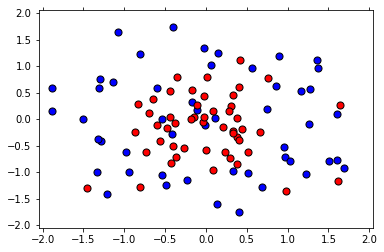

In [2]:
def load_pts(csv_name):
    data = np.asarray(pd.read_csv(csv_name, header=None))
    X = data[:,0:2]
    y = data[:,2]

    plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')
    
    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off')

    return X,y

X, y = load_pts('Data/data.csv')
plt.show()

### 2. 将我们的数据分为训练和测试集

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer

#Fixing a random seed
import random
random.seed(42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. 拟合一个决策树模型

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Define the model (with default hyperparameters)
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

现在我们来绘制模型，并找到测试 f1_score，看看我们做了什么。

以下函数将帮助我们绘制模型。

In [6]:
def plot_model(X, y, clf):
    plt.scatter(X[np.argwhere(y==0).flatten(),0],X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0],X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off')

    r = np.linspace(-2.1,2.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    z = clf.predict(h)

    s = s.reshape((np.size(r),np.size(r)))
    t = t.reshape((np.size(r),np.size(r)))
    z = z.reshape((np.size(r),np.size(r)))

    plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k', linewidths = 2)
    plt.show()

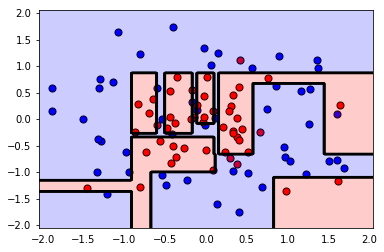

The Training F1 Score is 1.0
The Testing F1 Score is 0.7


In [7]:
plot_model(X, y, clf)
print('The Training F1 Score is', f1_score(train_predictions, y_train))
print('The Testing F1 Score is', f1_score(test_predictions, y_test))

In [8]:
The Training F1 Score is 1.0
The Testing F1 Score is 0.7


SyntaxError: invalid syntax (<ipython-input-8-d0715772f77a>, line 1)

现在有一些过拟合。 我们不仅仅是看图表，还需要看看高训练分（1.0）和低测试分（0.7）之间的差异。思考一下，我们是否可以找到更好的超参数来让这个模型做得更好？ 接下来我们将使用网格搜索。

### 4.（待办）使用网格搜索来完善模型


现在，我们将执行以下步骤：

1.首先，定义一些参数来执行网格搜索。 我们建议使用`max_depth`, `min_samples_leaf`, 和 `min_samples_split`。

2.使用`f1_score`，为模型制作记分器。

3.使用参数和记分器，在分类器上执行网格搜索。

4.将数据拟合到新的分类器中。

5.绘制模型并找到 f1_score。

6.如果模型不太好，请尝试更改参数的范围并再次拟合。

** _提示：_如果你遇到困难并希望看到一个可行的解决方案，请在同一个文件夹中查看解决方案 notebook。**

In [10]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune.
parameters = {'kernel':['poly', 'rbf'],'C':[0.1, 1, 10]}

# TODO: Make an fbeta_score scoring object.
scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer

# TODO: Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X, y)

# TODO: Get the estimator.
best_clf = grid_fit.best_estimator_


# Fit the new model.
best_clf.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))

# Plot the new model.
plot_model(X, y, best_clf)

# Let's also explore what parameters ended up being used in the new model.
best_clf

SyntaxError: invalid syntax (<ipython-input-10-07aae47f60a7>, line 16)